<h1 align="center" ><i style="font-size:larger"> Analytics and Predictive Modeling </i><br/><br/> Pre-processing as an introduction <br/> to Feature Engineering</h1><h3 align="center">Fall 2018</h3>

We often transform data before applying an algorithm to it.  Such transformations are known as _pre-processing_, although the name _feature engineering_ may be more appropriate.  In short, before we use algorithms as models, we first prepare the data for its use in that algorithm.  

We first set up __notebook__ mode for displaying graphics, and also we import __numpy__ and __matplotlib__.

In [1]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt

<p>&nbsp;</p>

## Pre-Processing with Sklearn: Olivetti Faces

We begin by __import__ing the __preprocessing__ module in __sklearn__.  We also will load __read_csv__ and __DataFrame__ from the __pandas__ module since we are working with data. 

In [2]:
from sklearn import preprocessing
from pandas import read_csv, DataFrame

In general, the scaling transformations in the pre-processing package do not produce wholesale changes in the data itself.  To illustrate, let's look at a different example -- olivetti faces -- which is 400 grey-scale images divided into 10 images of each of 40 people.  

Below we load it and also define a method for plotting multiple images.  

In [3]:
from sklearn.datasets import fetch_olivetti_faces

In [4]:
image_shape = (64, 64)

n_row, n_col = 2, 3
n_components = n_row * n_col

def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    #plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)


Executing the __fetch_olivetti_faces__ command loads the images.  We then break it up into __data__ and __target__ subsets. 

In [5]:
dataset = fetch_olivetti_faces()
faces = dataset.data
target = dataset.target
target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\jreis\scikit_learn_data


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

The target data reveals that there are 10 images of each of 40 people, shown below:

<IPython.core.display.Javascript object>


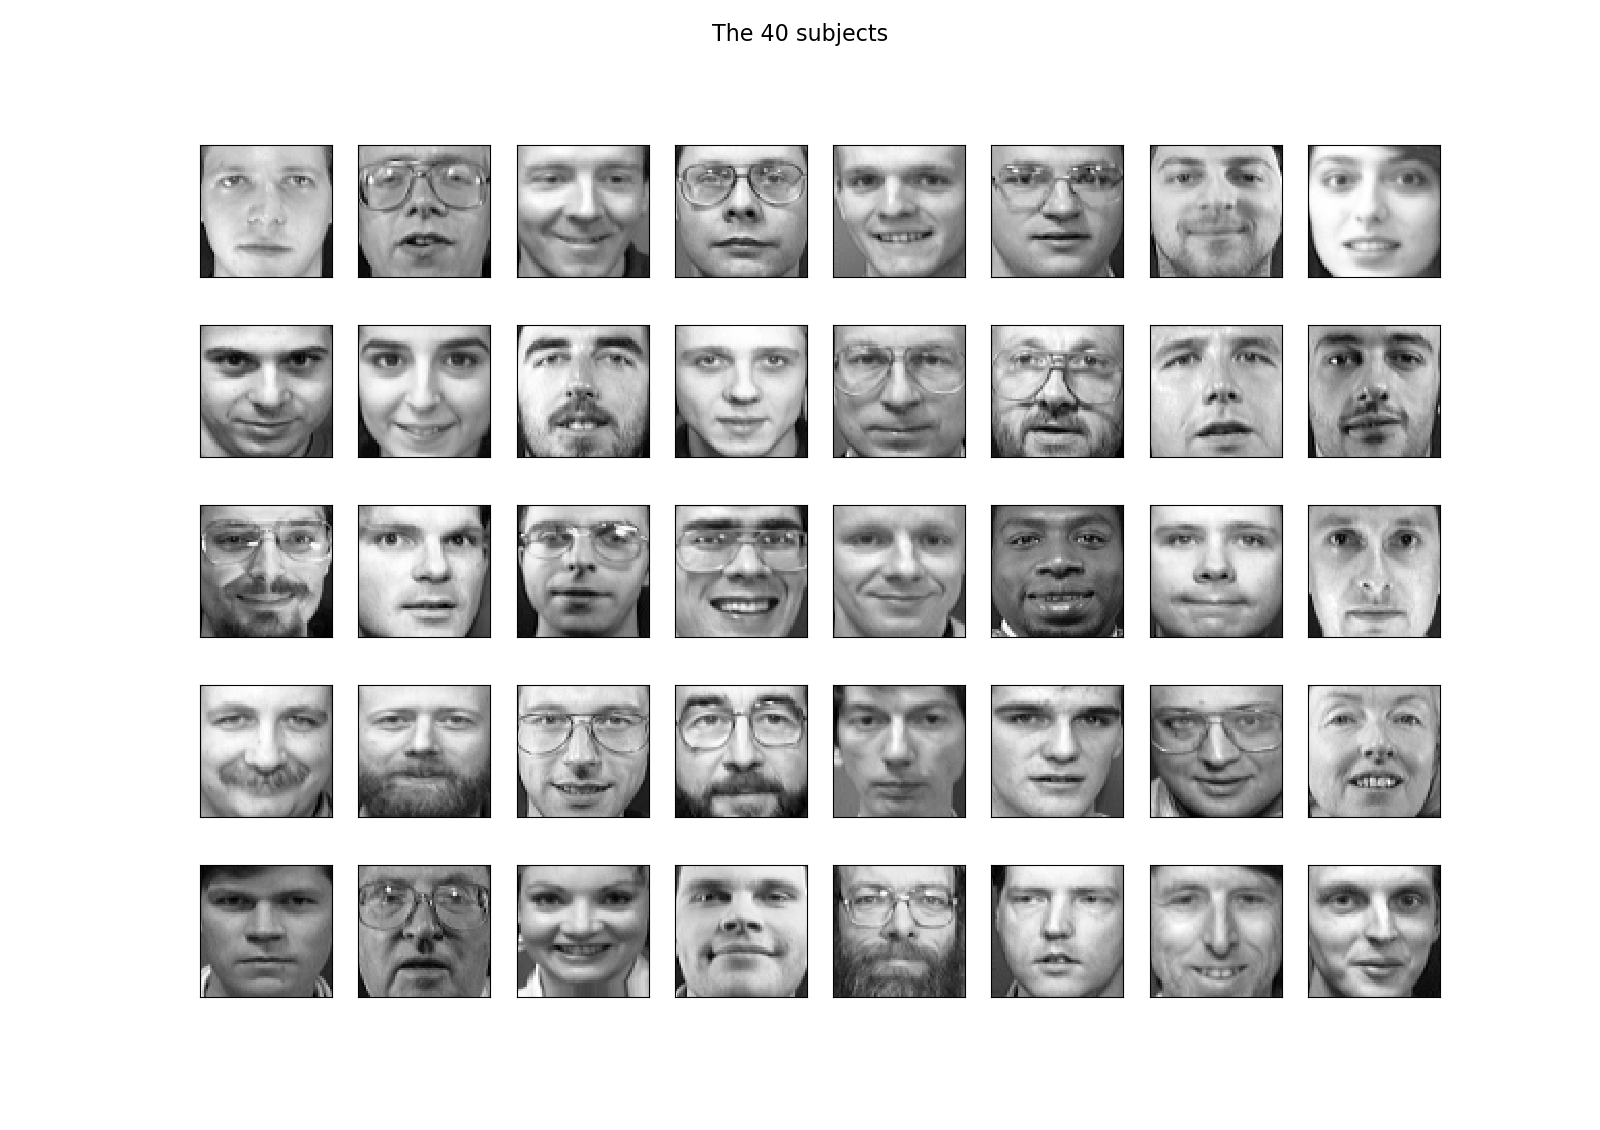

In [6]:
plot_gallery("The 40 subjects", faces[::10], 8, 5)

Notice that the eyes and other facial features are aligned from picture to picture.  This is also true of each of the 10 images of each subject. 

In [ ]:
plot_gallery("The 10 images of Subject 0", faces[:10], 5, 2)

We can even calculuate an "average face."

<IPython.core.display.Javascript object>


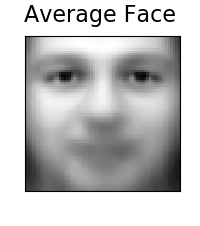

In [7]:
AverageFace = faces.mean(axis=0).reshape((1,-1))
plot_gallery("Average Face", AverageFace, 1, 1)

However, this average _is more a measure of the fact that the eyes and other features were aligned to begin with._ 

Morever, "subtracting the average face" does __not__ remove features the faces have in common.

<IPython.core.display.Javascript object>


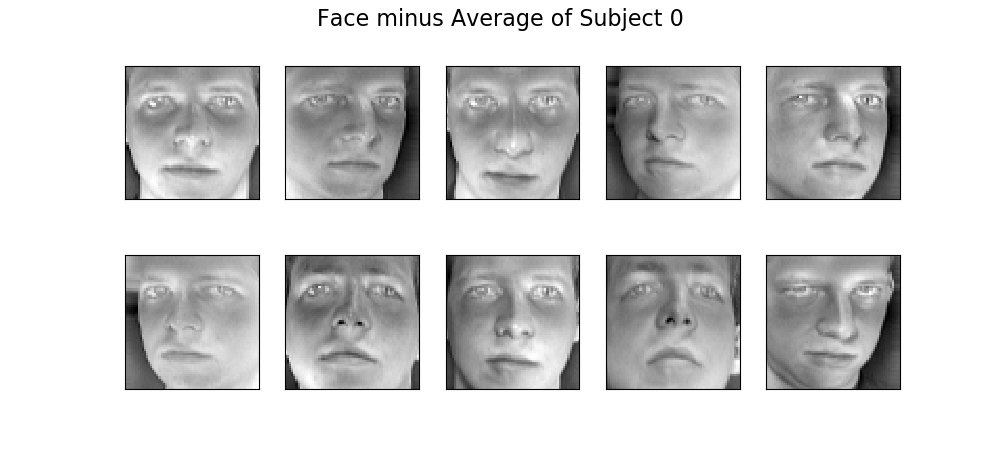

In [8]:
facesMinusAverage = np.array( [ face  - AverageFace for face in faces] )
plot_gallery("Face minus Average of Subject 0", facesMinusAverage[:10], 5, 2)

The reason is quite simple -- facial features are "spread out" over many parts (pixels) of the image.  _Standardization does not significantly change the nature of the data!_

Similarly, the faces change little (other than "brightness") under preprocessing methods such as __minmaxscale__ and __normalize__, which normalizes each column to a unit vector.  

<IPython.core.display.Javascript object>


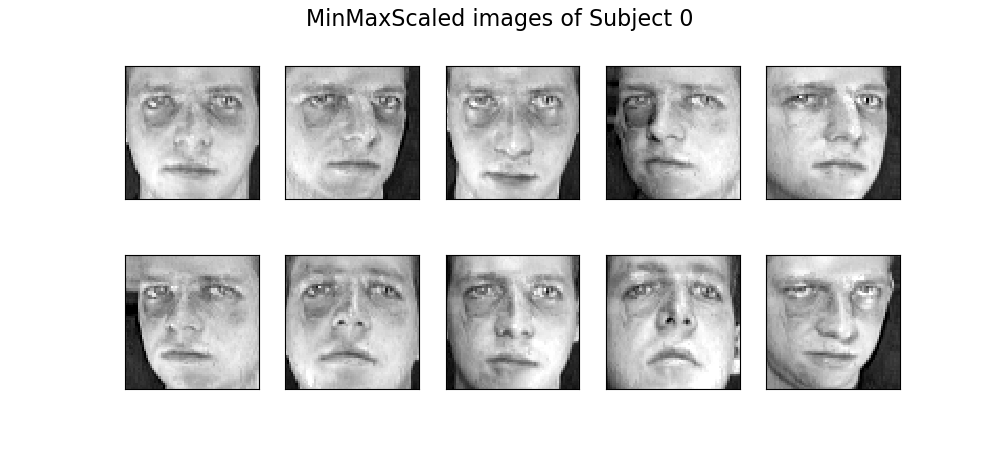

In [9]:
#MaxMin Scale Pre-processing
MinMaxFaces = preprocessing.minmax_scale(faces)
plot_gallery("MinMaxScaled images of Subject 0", MinMaxFaces[:10], 5, 2)

<IPython.core.display.Javascript object>


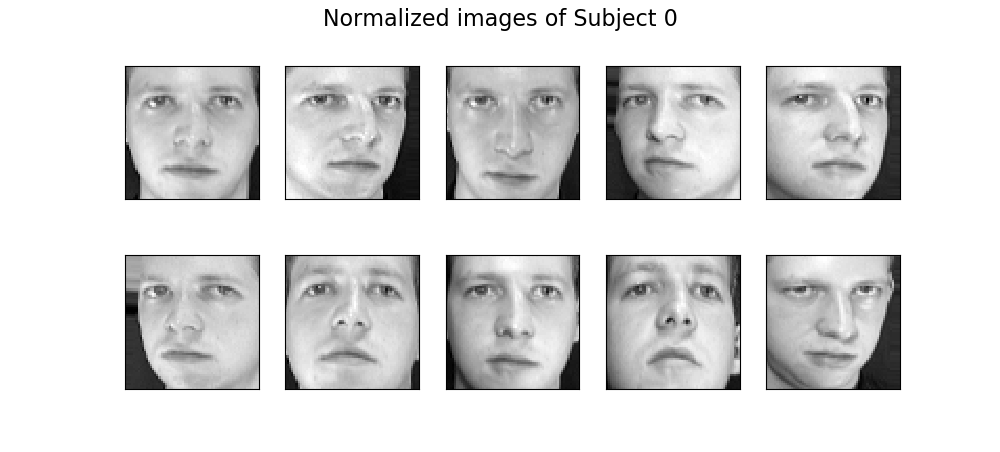

In [10]:
NormalizedFaces = preprocessing.normalize(faces)
plot_gallery("Normalized images of Subject 0", NormalizedFaces[:10], 5, 2)

Note: These are vectors even though they are not columns!    

<p>&nbsp;</p>

## Feature Engineering

Let's return to the images and the question of "How do we remove what all the faces have in common?", because we know that the classification depends on how different classes (the 40 individuals) differ from each other.  

This is not a question we can address by simply "transforming" the images.  We instead must _reduce_ the data from large images to lower dimensional features. 
That is, we must "decompose" the faces into a (lower dimensional) set of features that better distinguish one face from another.  

A typical way to do this is to use _Principal Components Analysis_, which is nothing more than rotating your space until most of the data corresponds to as few axes as possible.  For example, suppose we create some data which is mostly on the straight line $$y=\frac{4}{3}x+3$$ which forms an angle $\theta$ with the $x$-axis such that $\cos(\theta) = \frac 4 5 $ and $\sin(\theta) = \frac 3 5$. 

<IPython.core.display.Javascript object>


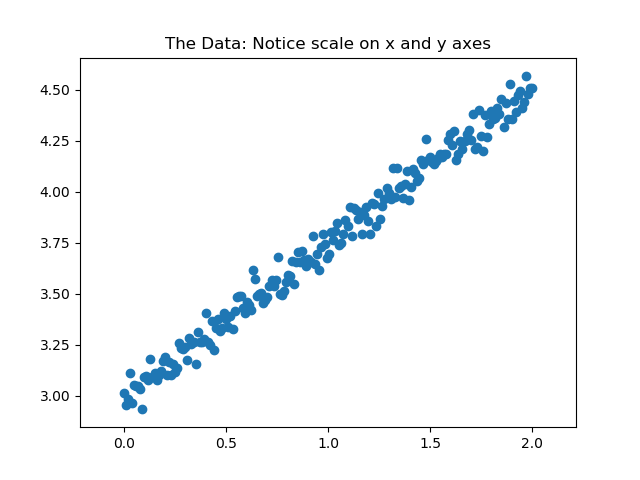

In [11]:
plt.figure() ## Starts a new figure canvas
             ## Also allows options like figsize
    
x = np.linspace(0,2,200)
y = 3/4*x + 3 + 0.05*np.random.randn(200)  # Linear Regression with adding noise

xy = np.vstack( [x,y]).T  # transpose so we have x,y as columns

plt.scatter(xy[:,0], xy[:,1])
plt.title("The Data: Notice scale on x and y axes")
plt.axis('equal');

In a previous notebook, we showed how to fit this data with a <b>linear_model</b> in __sklearn__.   However, as sometimes happens with feature engineering,

<h3 align='center', style='color:blue'>Feature engineering itself may answer the question, before<br/> any models or algorithms are even introduced!</h3>

<br/>

That is, we can fit 2d data to a linear model by simply centering the data and then rotating the axes. 

First let's standardize to the means (i.e., shift the origin to (0,0) ). These means are

In [12]:
xy.mean(axis=0)

array([1.        , 3.75060046])

Now let's use __scale__ to standardize to the means (i.e., translate so center is at (0,0) ). 

<IPython.core.display.Javascript object>


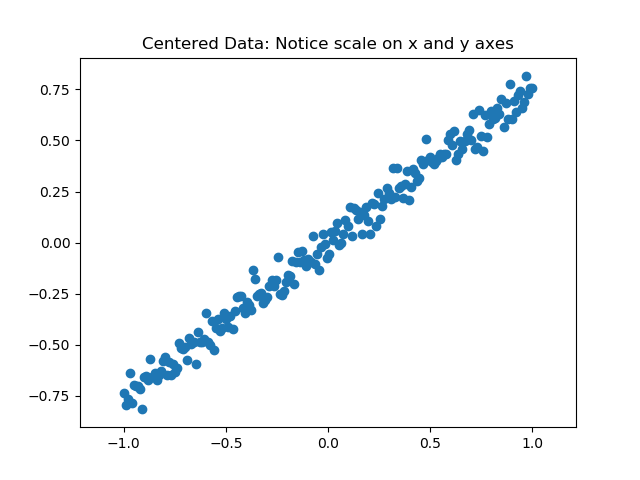

In [13]:
plt.figure() 

xy_centered = preprocessing.scale(xy, with_std = False)
plt.scatter( xy_centered[:,0], xy_centered[:,1])
plt.title("Centered Data: Notice scale on x and y axes")
plt.axis('equal');

A slope of $m = \frac 3 4$ corresponds to a unit vector of 
$$\left\langle run, rise \right\rangle = \left\langle \Delta x, \Delta y\right\rangle = \left\langle \frac 4 5, \frac 3 5 \right\rangle =\left\langle 0.8, 0.6 \right\rangle$$
Thus, almost all the variation is in this direction, as we illustrate below. 

<IPython.core.display.Javascript object>


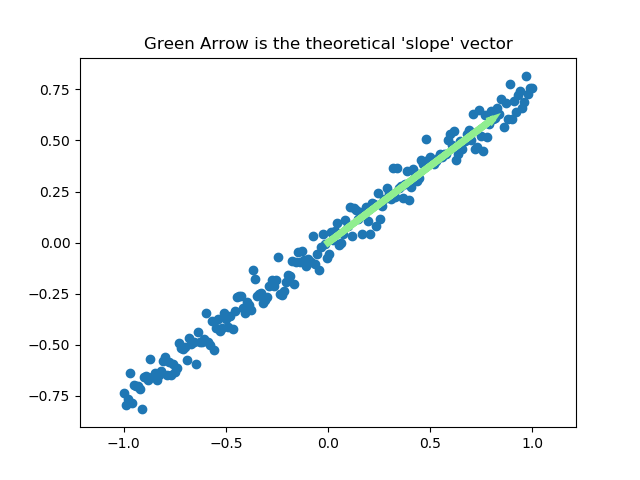

In [14]:
plt.figure() 

xy_centered = preprocessing.scale(xy, with_std = False)
plt.scatter( xy_centered[:,0], xy_centered[:,1])
plt.arrow(0,0,4/5,3/5, color='lightgreen', lw=5)
plt.title("Green Arrow is the theoretical 'slope' vector")
plt.axis('equal');

Principal components analysis (__PCA__) does the same thing in any number of dimensions -- that is, it centers the data and then determine the direction(s) which best explain the variation in the data.   

In [15]:
from sklearn.decomposition import PCA

Once again, we create a "model" object -- in this case, a __PCA__ object, 

In [16]:
pca = PCA( n_components = 2 )
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

which we then __fit__ to the data. 

In [17]:
pca.fit(xy) #Automatically centers the data

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

We can then assess the result, which in our case means how much of the variation in the data corresponds to each component.  

In [18]:
pca.explained_variance_

array([0.53481363, 0.00176565])

__SVD Interpretation:__ *Can be skipped if you are **not**  familiar with the Singular Value Decomposition:*  __PCA__ stands for _prinicipal components analysis_.  The explained variances are determined using the singular values of the *Data Matrix*  __xy__ (which has been centered).  

In particular, the _explained variance ratios_ are especially useful, both because they are easy to interpret and because they are related to the _Frobenius norm_ of a matrix. 

In [19]:
Sigma = pca.singular_values_ 
Sigma 

array([10.31639052,  0.59275947])

In [20]:
## Frobenius energy rescaling of the singular values...
Sigma**2/np.sum(Sigma**2)

array([0.99670944, 0.00329056])

In [21]:
## These are Frobenius scaled singular values... 
pca.explained_variance_ratio_

array([0.99670944, 0.00329056])

Thus, the first component of our __PCA__ explains more than 99% of the variance in our data.  

But what is this component? 

In [22]:
pca.components_

array([[-0.79465775, -0.6070577 ],
       [-0.6070577 ,  0.79465775]])

Clearly, the first row is quite close to our $\left\langle 0.8, 0.6 \right\rangle$ slope vector (or its negative).  Also, let's get the averages which were used initially to __scale__ the data. 

In [23]:
pca.mean_

array([1.        , 3.75060046])

Again, very close to what we calculated above.  Below we see this visually. 

<IPython.core.display.Javascript object>


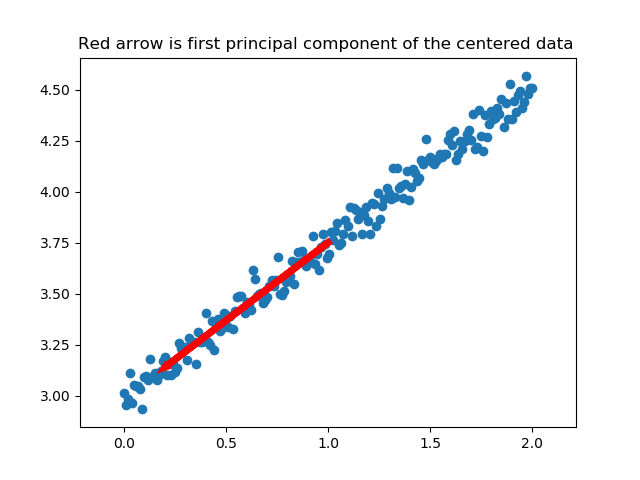

In [24]:
plt.figure() 

plt.scatter(xy[:,0], xy[:,1] )
plt.arrow(*pca.mean_, *pca.components_[0], color='red', lw=5, label = '$\mathbf{v}_')
plt.title("Red arrow is first principal component of the centered data ")
plt.axis('equal');

**SVD Interpretation:** The red arrow is the left singular vector $\mathbf{u}_1$ of the centered data matrix. 

Finally, once we apply the pca __transform__, we have essentially reduced the data to a 1-dimensional problem.  

**SVD Interpretation:** The pca __transform__ is a change of basis to the orthonormal basis defined by the columns of $V$, the matrix of right singular vectors of the centered data matrix.  

<IPython.core.display.Javascript object>


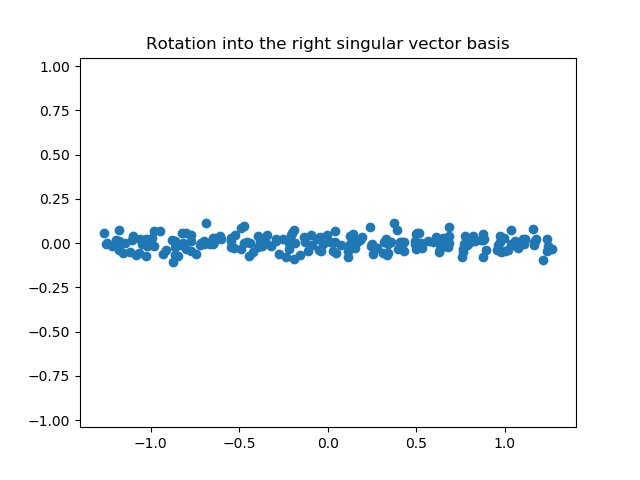

In [25]:
plt.figure()

xy_transformed = pca.transform(xy) #Change of basis - Dimensionality Reduction
plt.scatter(xy_transformed[:,0], xy_transformed[:,1])
plt.title('Rotation into the right singular vector basis')
plt.axis('equal');

This is the same data that we saw originally, but now -- except for some noise -- we can replace the __xy__ data with the x-coordinates of the transformed data. 

<IPython.core.display.Javascript object>


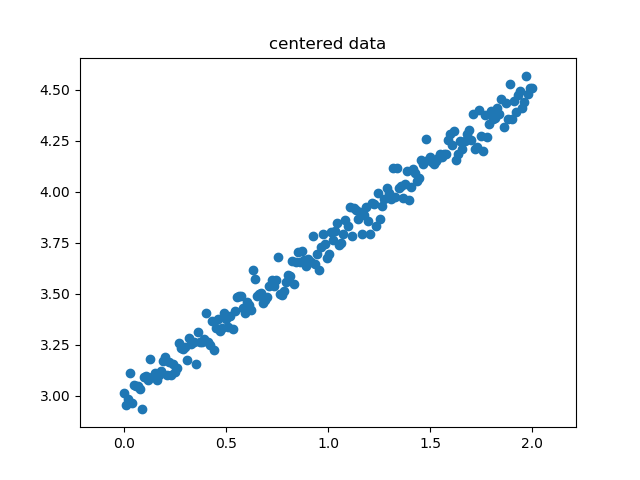

In [26]:
plt.figure() 

plt.scatter(xy[:,0], xy[:,1])
plt.title('centered data')

plt.axis('equal');

Suppose now we have 3 variables -- _x,y,z_ -- and that _z_ depends linearly on _x_ and _y_. 

In [27]:
xy = 2*np.random.rand(100,2)-1

z = 0.01*xy[:,1] - 0.02*xy[:,0] + 1 + 0.005*np.random.randn(100)

xyz = np.append(xy,z.reshape((-1,1)),axis=1)  # transpose so we have x,y,z as columns

xyz[:10]

array([[ 0.2523014 ,  0.75556347,  1.0026951 ],
       [-0.12331275,  0.64106098,  1.01439093],
       [ 0.40801691,  0.80665728,  0.99237534],
       [-0.64983889, -0.79015433,  0.99999743],
       [-0.86332809, -0.07966139,  1.01962522],
       [-0.9686446 , -0.20768693,  1.01427918],
       [ 0.26641978,  0.68694564,  0.99573014],
       [-0.63613702,  0.8798251 ,  1.01953029],
       [-0.71745696,  0.12326832,  1.01541152],
       [-0.1095123 , -0.62339902,  0.99238473]])

Because $z$ depends on $x$ and $y$, the data is actually only _2 dimensional_. 

<IPython.core.display.Javascript object>


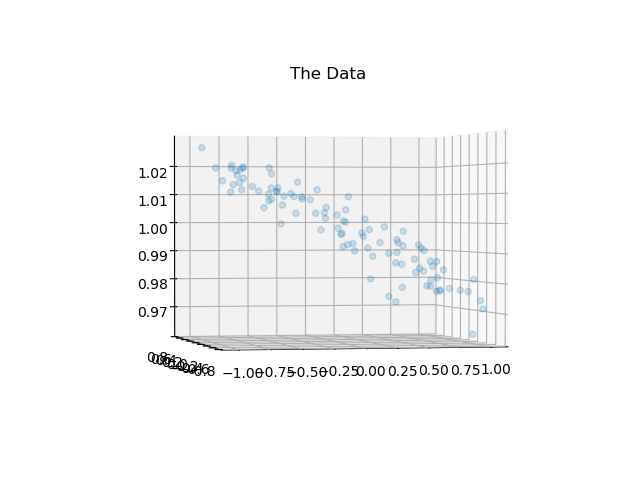

In [28]:
x,y,z = xyz[:,0],xyz[:,1],xyz[:,2]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, alpha = 0.2)
ax.set_zlim(0,2)
ax.set_title('The Data')
ax.axis('equal');

Let's now apply __PCA__, first by creating the PCA object. 

In [29]:
pca = PCA( n_components = 3 )
pca

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

which we then __fit__ to the data. 

In [30]:
pca.fit(xyz)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

We can then assess the result, which in our case means how much of the variation in the data corresponds to each component.  

In [31]:
pca.explained_variance_ratio_

array([5.11507269e-01, 4.88464169e-01, 2.85619156e-05])

Actually, let's look at this as a __cumsum__, which is a list in which the $k^{th}$ entry is the sum of the first _k_ entries of the list it is applied to. 

In [32]:
np.cumsum(pca.explained_variance_ratio_)

array([0.51150727, 0.99997144, 1.        ])

Thus, the first two components of our __PCA__ explain more than 99% of the variance in our data.  

We only need these two -- the third component has little to contribute. 

In [33]:
pca.components_

array([[ 0.77608628, -0.63025071, -0.0217746 ],
       [-0.63030789, -0.7763292 ,  0.00499315],
       [ 0.02005119, -0.00984959,  0.99975044]])

The first two rows are what explain the variance in the data. 

<IPython.core.display.Javascript object>


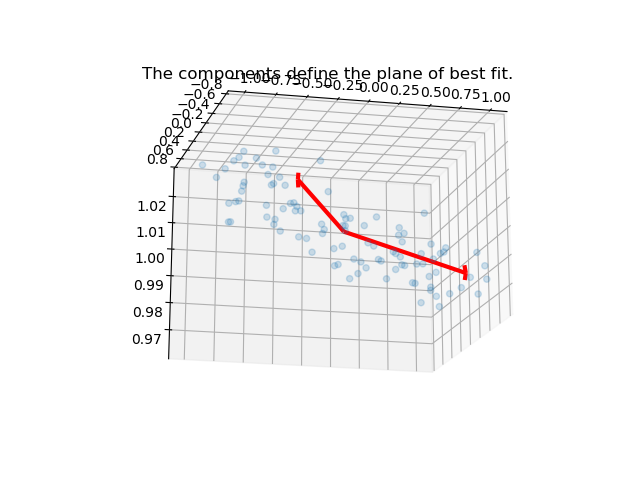

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, alpha = 0.2)
ax.quiver(*pca.mean_, *pca.components_[0], color='red', lw = 3, pivot='tail', arrow_length_ratio = 0.01)
ax.quiver(*pca.mean_, *pca.components_[1], color='red', lw = 3, pivot='tail', arrow_length_ratio = 0.01)
ax.set_zlim(0,2)
ax.set_title('The components define the plane of best fit.')
ax.axis('equal');

The third component is perpendicular to the data -- very little variance in that direction. 

<IPython.core.display.Javascript object>


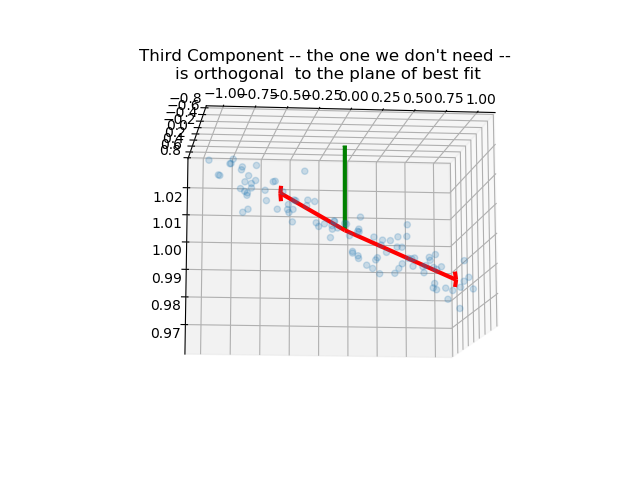

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, alpha = 0.2)
ax.quiver(*pca.mean_, *pca.components_[0], color='red', lw = 3, pivot='tail', arrow_length_ratio = 0.01)
ax.quiver(*pca.mean_, *pca.components_[1], color='red', lw = 3, pivot='tail', arrow_length_ratio = 0.01)
ax.quiver(*pca.mean_, *pca.components_[2], color='green', lw = 3, pivot='tail',
          arrow_length_ratio = 0.01, length = 0.03)
ax.set_zlim(0,2)
ax.set_title("Third Component -- the one we don't need -- \nis orthogonal  to the plane of best fit")
ax.axis('equal');

If we transform the data, we will only need the first two columns -- the third will have little variance. 

In [36]:
xyz_transformed = pca.transform(xyz)
xyz_transformed.var(axis=0)

array([3.61676643e-01, 3.45383323e-01, 2.01955639e-05])

We don't have to "guess" however, as would be very difficult with a very large data set.  Instead, we can use __Feature Selection__. 

In [37]:
from sklearn.feature_selection import VarianceThreshold

We create the __VarianceThreshold__ object. 

In [38]:
selector = VarianceThreshold( threshold = 0.001)

Then we do a __fit__ and a __transform__ simultaneously. 

In [39]:
xyz_reduced = selector.fit_transform(xyz_transformed)

In [40]:
xyz_transformed[:10]

array([[-3.36644485e-01, -6.65426703e-01,  6.81869410e-04],
       [-5.56242871e-01, -3.39724120e-01,  5.97107502e-03],
       [-2.47773014e-01, -8.03292564e-01, -7.01628852e-03],
       [-6.25347158e-02,  1.10317184e+00, -4.87943526e-03],
       [-6.76436818e-01,  6.86257344e-01,  3.46468865e-03],
       [-6.77366921e-01,  8.52002444e-01, -2.73074328e-03],
       [-2.82289312e-01, -6.21090388e-01, -5.32240282e-03],
       [-1.10483192e+00, -2.01820833e-01, -1.52531125e-03],
       [-6.91033078e-01,  4.36752326e-01,  1.78150883e-04],
       [ 2.51873457e-01,  6.33104697e-01, -3.29851108e-03]])

In [41]:
xyz_reduced[:10]

array([[-0.33664449, -0.6654267 ],
       [-0.55624287, -0.33972412],
       [-0.24777301, -0.80329256],
       [-0.06253472,  1.10317184],
       [-0.67643682,  0.68625734],
       [-0.67736692,  0.85200244],
       [-0.28228931, -0.62109039],
       [-1.10483192, -0.20182083],
       [-0.69103308,  0.43675233],
       [ 0.25187346,  0.6331047 ]])

Likewise, the olivetti faces image data is 4096 dimensional, and yet, all it takes is few hundred features to distinguish the image of one subject from the image of another -- shape of the eyes, shape of the nose, etcetera.  

## PCA and the Olivetti Faces

We cannot explicitly specify what these "much fewer features" are, but we can abstractly -- via PCA -- translate to the means and then rotate until most of the variation is explained by only a few hundred axes in our 4096 dimensional space. First, we define some parameters. 

In [42]:
n_samples, n_features = faces.shape
NumberOfComponents = 200

n_row, n_col = 2, 3
NumComponents4Plot = n_row * n_col

We will use the __RandomizedPCA__ version of principal components analysis.  This and several other dimensionality reduction methods can be found at 

http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

as well as in the scikit learn documentation (this example adapted from the link above).

In [43]:
from sklearn.decomposition import RandomizedPCA

First, we create a __RandomizedPCA__ object. Whitening is transforming the data so it is maximally uncorrelated.  

In [44]:
estimator = RandomizedPCA(n_components=NumberOfComponents, whiten=True)

C:\Users\jreis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


Then we fit it to the data. 

In [45]:
estimator.fit(faces)

RandomizedPCA(copy=True, iterated_power=2, n_components=200,
       random_state=None, whiten=True)

Below are the first few components -- analogous to the "slope vector" -- these are used to transform the data, but are not data themselves. 

<IPython.core.display.Javascript object>


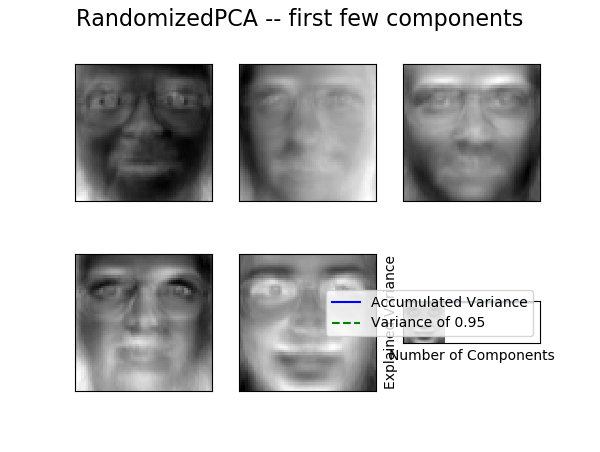

In [46]:
plot_gallery('RandomizedPCA -- first few components', estimator.components_[:NumComponents4Plot], n_col, n_row)

Let's see how many components we would need to explain 95% of the data.  To do so, we look at explained variance ratios. 

In [47]:
estimator.explained_variance_ratio_[:10]  # the first 10

array([0.23812714, 0.13993959, 0.07968612, 0.04998336, 0.03609853,
       0.03156939, 0.02426832, 0.02036398, 0.01958116, 0.01672123],
      dtype=float32)

To better illustrate, let's do a cummulative sum in which the $k^{th}$ entry is the sum of the first $k$ variance ratios. 

In [48]:
CummulativeVariance = np.cumsum(estimator.explained_variance_ratio_)

In [49]:
plt.plot(CummulativeVariance, 'b-', label = "Accumulated Variance")
plt.plot([0,NumberOfComponents],[0.95,0.95], 'g--', label="Variance of 0.95")
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.legend(loc = 4)

It appears that 95% of the variance is explained after about 120 components. More precisely, let's do the following:

In [ ]:
np.searchsorted(CummulativeVariance,0.95)

Thus, we may be able to solve our problem in a space that is less than 200 dimensional rather than using the full 4096 dimensional context.  Before using this in a predictive model, we would apply the __transform__ method to obtain the data but in a lower dimensional space (we'll see this later). 

<p>&nbsp;</p>

## Summary

We often must transform data, which in "small doses" is called _preprocessing_.  In higher amounts, and especially after the first "cycle" of the predictive modeling process, it is called "feature engineering" and may involve steps that suppress noise or reduce the dimensionality of the problem. 

Regardless, bias is always an issue -- one that must always be taken into account.  Consequently, we will often revisit the issue of bias in this course. 

